In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('data.csv')

# Display the first few rows and basic info to understand the structure
print(data.head())
print(data.info())

   Vibration  Motor Internal  Motor Surface  Wire internal1  Wire internal2  \
0      10.90           32.75           32.5           30.25           30.12   
1      11.10           32.75           32.5           30.25           30.19   
2      10.94           32.75           32.5           30.25           30.12   
3      10.87           32.75           32.5           30.25           30.19   
4      10.90           32.75           32.5           30.25           30.12   

   Motor Stress  Machine stress  Overall Stress  
0        273.59          273.59          273.59  
1        278.61          278.61          278.61  
2        274.59          274.59          274.59  
3        272.83          272.84          272.84  
4        273.59          273.59          273.59  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Vibration       909 non-nu

In [2]:
# Check for missing values and basic statistics to understand the data better
print(data.isnull().sum())
print(data.describe())

Vibration         0
Motor Internal    0
Motor Surface     0
Wire internal1    0
Wire internal2    0
Motor Stress      0
Machine stress    0
Overall Stress    0
dtype: int64
        Vibration  Motor Internal  Motor Surface  Wire internal1  \
count  909.000000      909.000000     909.000000      909.000000   
mean     4.786205       39.699395      39.105061       30.253828   
std      4.373422        4.516785       3.544900        0.014940   
min     -1.260000       32.750000      32.500000       30.190000   
25%      0.980000       35.500000      36.000000       30.250000   
50%      2.590000       39.750000      39.250000       30.250000   
75%     10.750000       43.750000      42.250000       30.250000   
max     11.570000       47.500000      44.750000       30.310000   

       Wire internal2  Motor Stress  Machine stress  Overall Stress  
count      909.000000    909.000000      909.000000      909.000000  
mean        30.215237    120.126425      120.133751      120.129780  
std 

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target (y)
X = data.drop(columns=['Overall Stress'])
y = data['Overall Stress']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Model Evaluation:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Model Evaluation:
Mean Squared Error: 1.0014761745604288
R-squared: 0.9999194136068219


C:\Users\Harinipremkumar\AppData\Local\Temp\ipykernel_18988\1352658143.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='#374151')


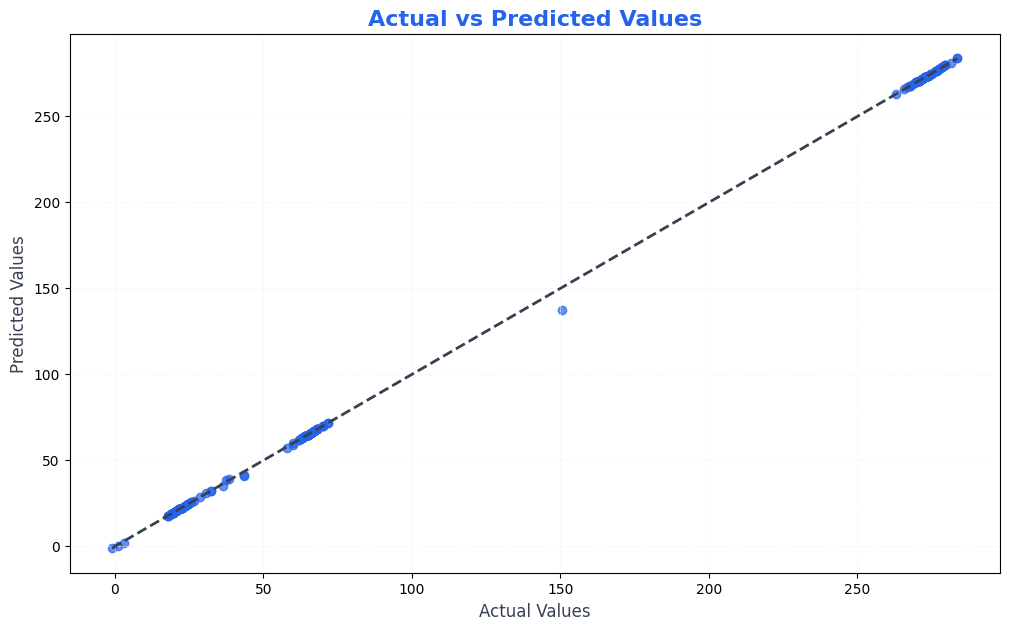

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Plot actual vs predicted values
plt.figure(figsize=(12, 7))
plt.scatter(y_test, predictions, alpha=0.7, color='#2563EB')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='#374151')
plt.title('Actual vs Predicted Values', fontsize=16, fontweight='semibold', color='#2563EB')
plt.xlabel('Actual Values', fontsize=12, fontweight='medium', color='#374151')
plt.ylabel('Predicted Values', fontsize=12, fontweight='medium', color='#374151')
plt.grid(color='#F3F4F6', linestyle='--', linewidth=0.5)
plt.show()

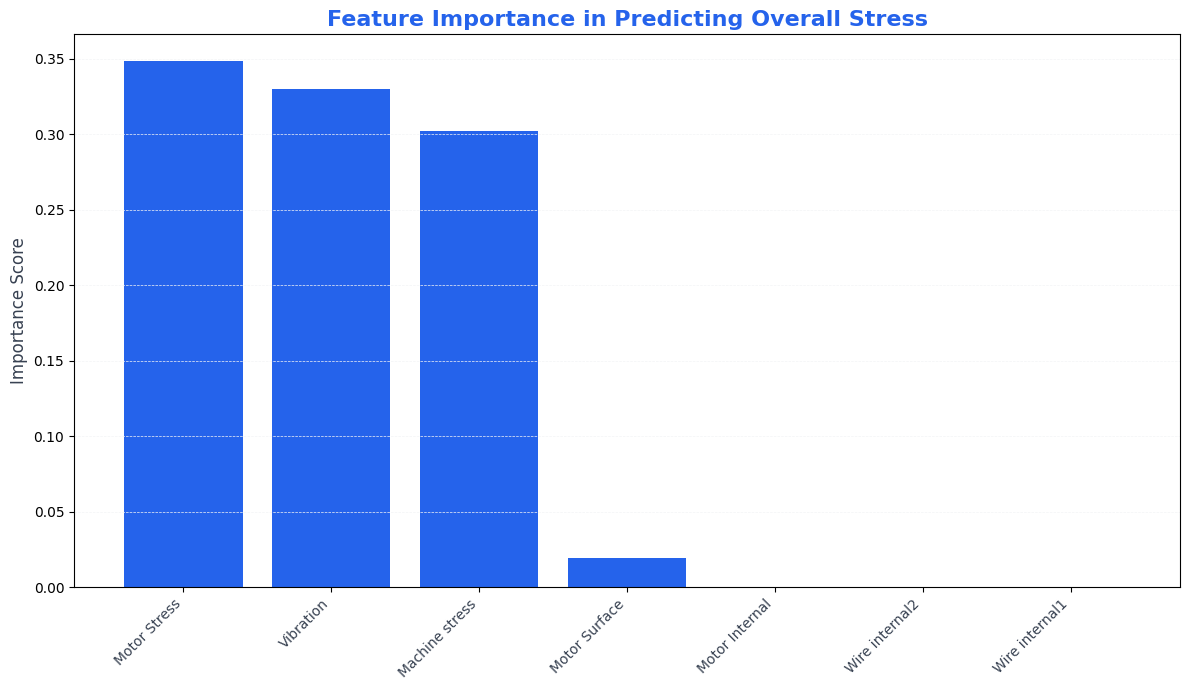

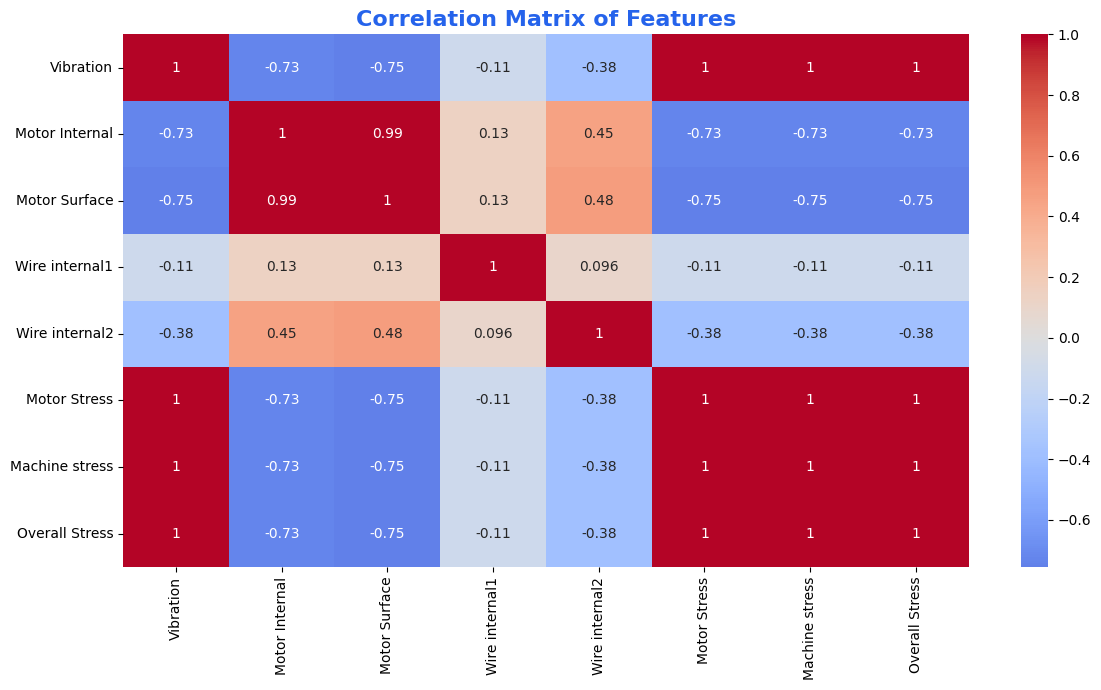

Key Statistical Insights:
Feature Importance Ranking:
          Feature    Importance
5    Motor Stress  3.486349e-01
0       Vibration  3.296090e-01
6  Machine stress  3.023552e-01
2   Motor Surface  1.936812e-02
1  Motor Internal  2.884159e-05
4  Wire internal2  3.875594e-06
3  Wire internal1  4.812026e-08
Descriptive Statistics for Key Features:
        Vibration  Motor Internal  Motor Surface  Overall Stress
count  909.000000      909.000000     909.000000      909.000000
mean     4.786205       39.699395      39.105061      120.129780
std      4.373422        4.516785       3.544900      109.776806
min     -1.260000       32.750000      32.500000      -31.640000
25%      0.980000       35.500000      36.000000       24.600000
50%      2.590000       39.750000      39.250000       65.000000
75%     10.750000       43.750000      42.250000      269.830000
max     11.570000       47.500000      44.750000      290.410000


In [5]:
import seaborn as sns

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 7))
plt.bar(feature_importance['Feature'], feature_importance['Importance'], color='#2563EB')
plt.title('Feature Importance in Predicting Overall Stress', fontsize=16, fontweight='semibold', color='#2563EB')
plt.xticks(rotation=45, ha='right', color='#374151')
plt.ylabel('Importance Score', fontsize=12, fontweight='medium', color='#374151')
plt.grid(axis='y', color='#F3F4F6', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Calculate correlation matrix
correlation_matrix = data.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features', fontsize=16, fontweight='semibold', color='#2563EB')
plt.tight_layout()
plt.show()

# Print statistical insights
print("\
Key Statistical Insights:")
print("\
Feature Importance Ranking:")
print(feature_importance)

print("\
Descriptive Statistics for Key Features:")
print(data[['Vibration', 'Motor Internal', 'Motor Surface', 'Overall Stress']].describe())

Model Performance Comparison:
                        RMSE        MAE        R2
Linear Regression   0.002846   0.002389  1.000000
Ridge Regression    0.084165   0.071243  0.999999
Lasso Regression    1.021122   0.947451  0.999916
Random Forest       0.999652   0.140485  0.999920
Gradient Boosting   0.607206   0.133263  0.999970
SVR                23.268604  13.470598  0.956433


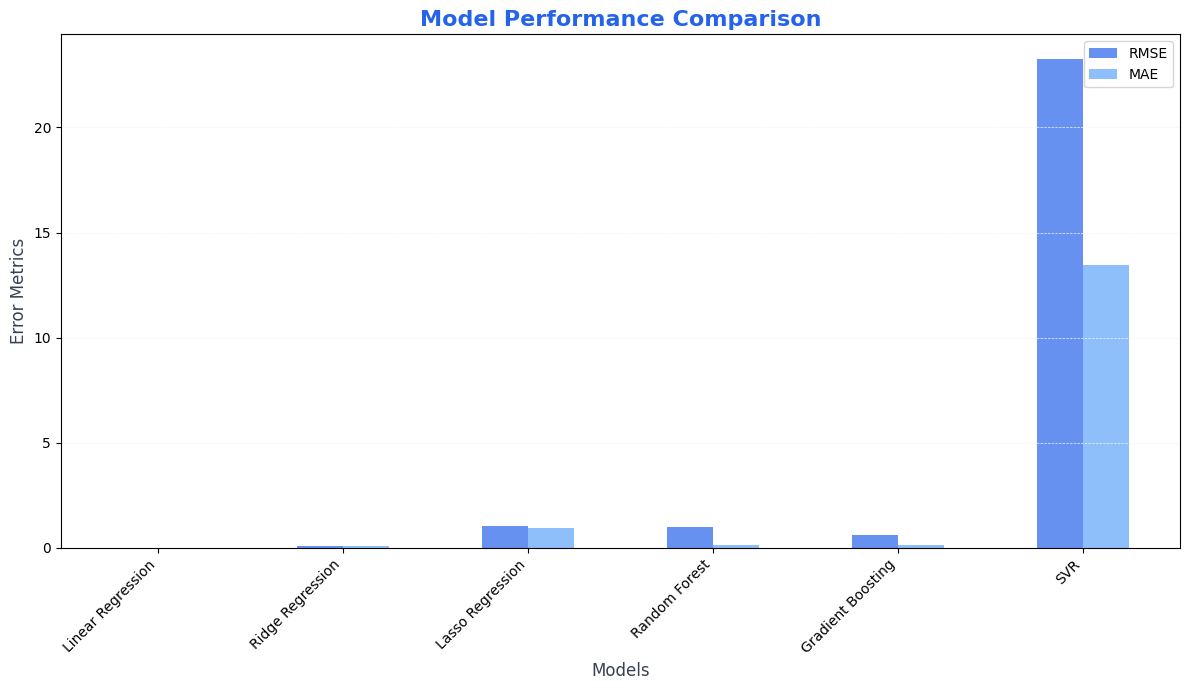

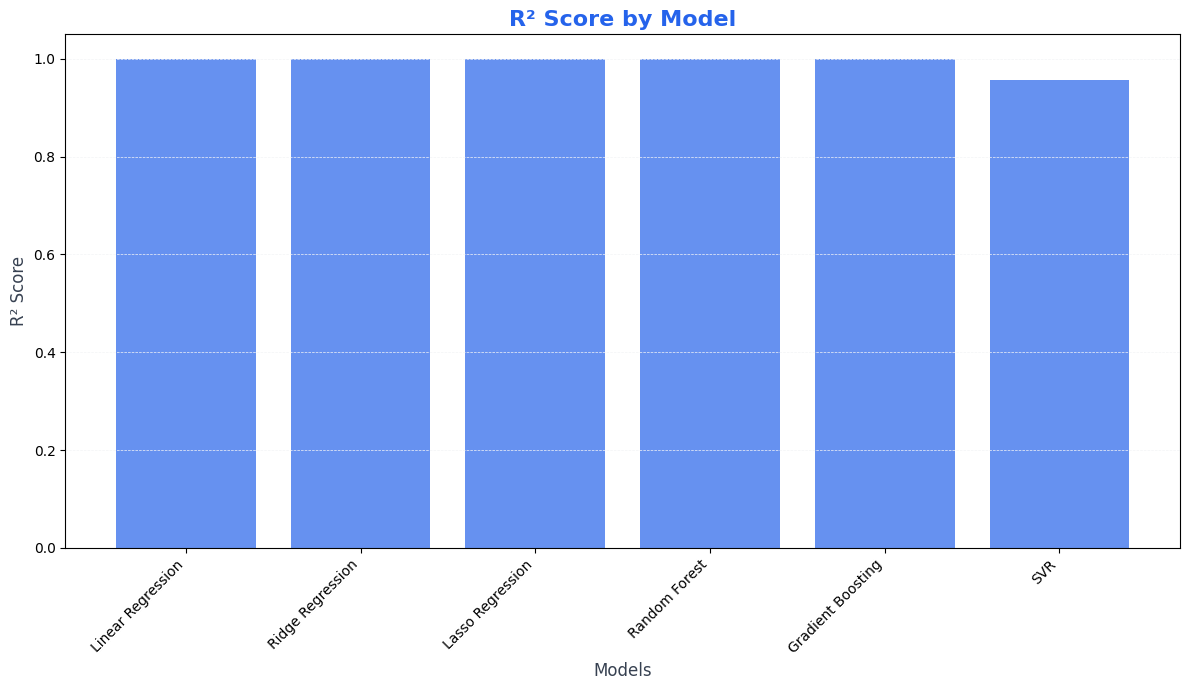

Best Performing Model: Linear Regression
R² Score: 1.0000
RMSE: 0.0028
MAE: 0.0024


In [6]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf')
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print("\
Model Performance Comparison:")
print(results_df)

# Plot performance comparison
plt.figure(figsize=(12, 7))
bar_width = 0.25
index = np.arange(len(results))

plt.bar(index, [results[model]['RMSE'] for model in results], bar_width, 
        label='RMSE', color='#2563EB', alpha=0.7)
plt.bar(index + bar_width, [results[model]['MAE'] for model in results], bar_width,
        label='MAE', color='#60A5FA', alpha=0.7)

plt.title('Model Performance Comparison', fontsize=16, fontweight='semibold', color='#2563EB')
plt.xlabel('Models', fontsize=12, fontweight='medium', color='#374151')
plt.ylabel('Error Metrics', fontsize=12, fontweight='medium', color='#374151')
plt.xticks(index + bar_width/2, results.keys(), rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', color='#F3F4F6', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Plot R² scores
plt.figure(figsize=(12, 7))
plt.bar(results.keys(), [results[model]['R2'] for model in results], color='#2563EB', alpha=0.7)
plt.title('R² Score by Model', fontsize=16, fontweight='semibold', color='#2563EB')
plt.xlabel('Models', fontsize=12, fontweight='medium', color='#374151')
plt.ylabel('R² Score', fontsize=12, fontweight='medium', color='#374151')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', color='#F3F4F6', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Find best model
best_model = results_df['R2'].idxmax()
print(f"\
Best Performing Model: {best_model}")
print(f"R² Score: {results_df.loc[best_model, 'R2']:.4f}")
print(f"RMSE: {results_df.loc[best_model, 'RMSE']:.4f}")
print(f"MAE: {results_df.loc[best_model, 'MAE']:.4f}")

In [8]:
%pip install pyswarm

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4539 sha256=dcd1acc7b351c97db962f75d7203376a47960cba78f956283368ced7c57b30df
  Stored in directory: c:\users\harinipremkumar\appdata\local\pip\cache\wheels\93\15\89\3970ef96abd6123028010a90f007c4e6a2bed700db0aa2d36a
Successfully built pyswarm




[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
 pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.5/1.8 MB 199.7 kB/s eta 0:00:07
   ----------- ---------------------------- 0.5/1.8 MB 199.7 kB/s eta 0:00:07
   ----------- ---------------------------- 0.5/1.8 MB 199.7 kB/s eta 0:00:0

In [10]:
%pip install pyswarms

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [12]:
import numpy as np
from pyswarms.single.global_best import GlobalBestPSO

In [14]:
from pyswarm import pso
from sklearn.model_selection import cross_val_score

# Define the objective function for PSO (minimizing negative R² score)
def objective_function(params):
    n_estimators, max_depth = int(params[0]), int(params[1])
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    return -scores.mean()

# Define bounds for hyperparameters
lb = [10, 1]  # Lower bounds: n_estimators, max_depth
ub = [200, 20]  # Upper bounds: n_estimators, max_depth

# Run PSO
best_params, best_score = pso(objective_function, lb, ub, swarmsize=20, maxiter=10)

# Train the optimized model
optimized_model = RandomForestRegressor(n_estimators=int(best_params[0]), max_depth=int(best_params[1]), random_state=42)
optimized_model.fit(X_train_scaled, y_train)

# Evaluate the optimized model
optimized_predictions = optimized_model.predict(X_test_scaled)
optimized_mse = mean_squared_error(y_test, optimized_predictions)
optimized_r2 = r2_score(y_test, optimized_predictions)

print("Optimized Model Performance:")
print("Best Parameters (n_estimators, max_depth):", best_params)
print("Best Cross-Validated R² Score:", -best_score)
print("Test R² Score:", optimized_r2)
print("Test Mean Squared Error:", optimized_mse)

Stopping search: Swarm best objective change less than 1e-08
Optimized Model Performance:
Best Parameters (n_estimators, max_depth): [51.68500296 18.10327002]
Best Cross-Validated R² Score: 0.9986197718147082
Test R² Score: 0.9999433501554437
Test Mean Squared Error: 0.7040080512144469


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import base64
from io import BytesIO

# Create time series visualization
fig1 = px.line(df, x=df.index, y=['Motor_Stress', 'Machine_stress', 'Overall_Stress'],
               title='Stress Measurements Over Time',
               template='plotly_white')
fig1.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    font_family='Inter',
    title_font_size=20,
    title_font_color='#2563EB'
)

# Create correlation heatmap
correlation_matrix = df.corr()
fig2 = px.imshow(correlation_matrix,
                 color_continuous_scale='RdBu_r',
                 title='Feature Correlation Heatmap')
fig2.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    font_family='Inter',
    title_font_size=20,
    title_font_color='#2563EB'
)

# Create distribution plots
fig3 = make_subplots(rows=2, cols=2, subplot_titles=['Motor Stress Distribution', 
                                                    'Machine Stress Distribution',
                                                    'Vibration Distribution',
                                                    'Temperature Distribution'])

fig3.add_trace(go.Histogram(x=df['Motor_Stress'], name='Motor Stress'), row=1, col=1)
fig3.add_trace(go.Histogram(x=df['Machine_stress'], name='Machine Stress'), row=1, col=2)
fig3.add_trace(go.Histogram(x=df['Vibration'], name='Vibration'), row=2, col=1)
fig3.add_trace(go.Histogram(x=df['Motor_Internal_Temperature'], name='Motor Temperature'), row=2, col=2)

fig3.update_layout(
    height=800,
    showlegend=False,
    title_text='Feature Distributions',
    plot_bgcolor='white',
    paper_bgcolor='white',
    font_family='Inter',
    title_font_size=20,
    title_font_color='#2563EB'
)

# Create scatter plot matrix for key features
fig4 = px.scatter_matrix(df[['Motor_Stress', 'Machine_stress', 'Vibration', 'Motor_Internal_Temperature']],
                        title='Feature Relationships Matrix')
fig4.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    font_family='Inter',
    title_font_size=20,
    title_font_color='#2563EB'
)

# Save the dashboard as an HTML file
dashboard_html = f"""
<!DOCTYPE html>
<html>
<head>
    <title>Machine Monitoring Dashboard</title>
    <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
    <style>
        body {{
            font-family: Inter, sans-serif;
            margin: 0;
            padding: 20px;
            background-color: #F8FAFC;
        }}
        .dashboard-container {{
            max-width: 1200px;
            margin: 0 auto;
        }}
        .chart-container {{
            background-color: white;
            border-radius: 8px;
            box-shadow: 0 1px 3px rgba(0,0,0,0.12);
            margin-bottom: 20px;
            padding: 15px;
        }}
        h1 {{
            color: #2563EB;
            text-align: center;
            margin-bottom: 30px;
        }}
    </style>
</head>
<body>
    <div class="dashboard-container">
        <h1>Machine Monitoring Dashboard</h1>
        <div class="chart-container">
            {fig1.to_html(full_html=False)}
        </div>
        <div class="chart-container">
            {fig2.to_html(full_html=False)}
        </div>
        <div class="chart-container">
            {fig3.to_html(full_html=False)}
        </div>
        <div class="chart-container">
            {fig4.to_html(full_html=False)}
        </div>
    </div>
</body>
</html>
"""

# Save the dashboard
with open('machine_monitoring_dashboard.html', 'w') as f:
    f.write(dashboard_html)



In [18]:
print("Interactive dashboard has been created and saved as 'machine_monitoring_dashboard.html'")

Interactive dashboard has been created and saved as 'machine_monitoring_dashboard.html'
